### 10.3.2. グラフを四つに並べる

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

act = pd.read_csv('OTg6QzA_activities.csv')
act.shape # データの構造、行列のサイズ

(66281, 4)

In [2]:
from datetime import datetime

# 距離計算
def calc_dist(df):
  x_d = df['X'] - df['p_x']
  y_d = df['Y'] - df['p_y']
  z_d = df['Z'] - df['p_z']
  return np.sqrt(x_d**2 + y_d**2 + z_d**2)

# 時間差分（単位：sec)
def calc_timediff(df):
  d1 = datetime.strptime(str(df['timestamp']),
                         "%Y-%m-%d %H:%M:%S.%f")
  d2 = datetime.strptime(str(df['p_timestamp']),
                         "%Y-%m-%d %H:%M:%S.%f")
  return (d1 - d2).total_seconds()

# 速度を求める
def calc_act(df):
  if df['d_time'] != 0:
    return np.abs(df['dist'] / df['d_time'])
  else:
    # 正常な数値ではない。
    return 0

In [3]:
# 22年1月1日 データのみ抽出し、視覚化する。
data220101 = act[ (act['timestamp'] >= '2022-01-01 00:00:00.000') &
                 (act['timestamp'] < '2022-01-02 00:00:00.000') ].copy()
data220101['p_timestamp'] = data220101['timestamp'].shift(1)
data220101['p_x'] = data220101['X'].shift(1)
data220101['p_y'] = data220101['Y'].shift(1)
data220101['p_z'] = data220101['Z'].shift(1)

# 22年1月2日 データのみ抽出し、視覚化する。
data220102 = act[ (act['timestamp'] >= '2022-01-02 00:00:00.000') &
                 (act['timestamp'] < '2022-01-03 00:00:00.000') ].copy()
data220102['p_timestamp'] = data220102['timestamp'].shift(1)
data220102['p_x'] = data220102['X'].shift(1)
data220102['p_y'] = data220102['Y'].shift(1)
data220102['p_z'] = data220102['Z'].shift(1)

# 22年1月3日 データのみ抽出し、視覚化する。
data220103 = act[ (act['timestamp'] >= '2022-01-03 00:00:00.000') &
                 (act['timestamp'] < '2022-01-04 00:00:00.000') ].copy()
data220103['p_timestamp'] = data220103['timestamp'].shift(1)
data220103['p_x'] = data220103['X'].shift(1)
data220103['p_y'] = data220103['Y'].shift(1)
data220103['p_z'] = data220103['Z'].shift(1)

# 22年1月4日 データのみ抽出し、視覚化する。
data220104 = act[ (act['timestamp'] >= '2022-01-04 00:00:00.000') &
                 (act['timestamp'] < '2022-01-05 00:00:00.000') ].copy()
data220104['p_timestamp'] = data220104['timestamp'].shift(1)
data220104['p_x'] = data220104['X'].shift(1)
data220104['p_y'] = data220104['Y'].shift(1)
data220104['p_z'] = data220104['Z'].shift(1)

In [4]:
# NaN値がある行を削除する。NaNがあると距離と速度の計算ができない。
# 最初の行が削除されるでしょう。
cleaned1 = data220101.dropna()
cleaned2 = data220102.dropna()
cleaned3 = data220103.dropna()
cleaned4 = data220104.dropna()

In [5]:
cleaned1['dist'] = cleaned1[["X","p_x", "Y", "p_y", "Z",
                             "p_z"]].apply(calc_dist, axis=1)
cleaned1['d_time'] = cleaned1[["timestamp", "p_timestamp"]].apply(
                           calc_timediff, axis=1)
cleaned1['calc_act'] = cleaned1[["dist", "d_time"]].apply(
                           calc_act, axis=1)

# 必要な列だけ抽出
cleaned1['timestamp'] = cleaned1['timestamp'].astype('datetime64[ns]')
cleaned1 = cleaned1[['timestamp', 'calc_act']]

C:\Users\sunin\AppData\Local\Temp\ipykernel_38864\663864527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned1['dist'] = cleaned1[["X","p_x", "Y", "p_y", "Z", "p_z"]].apply(
C:\Users\sunin\AppData\Local\Temp\ipykernel_38864\663864527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned1['d_time'] = cleaned1[["timestamp", "p_timestamp"]].apply(
C:\Users\sunin\AppData\Local\Temp\ipykernel_38864\663864527.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [6]:
cleaned2['dist'] = cleaned2[["X","p_x", "Y", "p_y", "Z", "p_z"]].apply(
                          calc_dist, axis=1)
cleaned2['d_time'] = cleaned2[["timestamp", "p_timestamp"]].apply(
                          calc_timediff, axis=1)
cleaned2['calc_act'] = cleaned2[["dist", "d_time"]].apply(
  calc_act, axis=1)

cleaned2['timestamp'] = cleaned2['timestamp'].astype('datetime64[ns]')

# 必要な列だけ抽出
cleaned2 = cleaned2[['timestamp', 'calc_act']]

C:\Users\sunin\AppData\Local\Temp\ipykernel_38864\1544676361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned2['dist'] = cleaned2[["X","p_x", "Y", "p_y", "Z", "p_z"]].apply(
C:\Users\sunin\AppData\Local\Temp\ipykernel_38864\1544676361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned2['d_time'] = cleaned2[["timestamp", "p_timestamp"]].apply(
C:\Users\sunin\AppData\Local\Temp\ipykernel_38864\1544676361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [7]:
cleaned3['dist'] = cleaned3[["X","p_x", "Y", "p_y", "Z", "p_z"]].apply(
                             calc_dist, axis=1)
cleaned3['d_time'] = cleaned3[["timestamp","p_timestamp"]].apply(
                             calc_timediff, axis=1)
cleaned3['calc_act'] = cleaned3[["dist", "d_time"]].apply(
  calc_act, axis=1)

cleaned3['timestamp'] = cleaned3['timestamp'].astype('datetime64[ns]')

# 必要な列だけ抽出
cleaned3 = cleaned3[['timestamp', 'calc_act']]

C:\Users\sunin\AppData\Local\Temp\ipykernel_38864\3287790235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned3['dist'] = cleaned3[["X","p_x", "Y", "p_y", "Z", "p_z"]].apply(
C:\Users\sunin\AppData\Local\Temp\ipykernel_38864\3287790235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned3['d_time'] = cleaned3[["timestamp","p_timestamp"]].apply(
C:\Users\sunin\AppData\Local\Temp\ipykernel_38864\3287790235.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [8]:
cleaned4['dist'] = cleaned4[["X","p_x", "Y", "p_y", "Z", "p_z"]].apply(
                            calc_dist, axis=1)
cleaned4['d_time'] = cleaned4[["timestamp", "p_timestamp"]].apply(
                            calc_timediff, axis=1)
cleaned4['calc_act'] = cleaned4[["dist", "d_time"]].apply(
                            calc_act, axis=1)

cleaned4['timestamp'] = cleaned4['timestamp'].astype('datetime64[ns]')

# 必要な列だけ抽出
cleaned4 = cleaned4[['timestamp', 'calc_act']]

C:\Users\sunin\AppData\Local\Temp\ipykernel_38864\4117277773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned4['dist'] = cleaned4[["X","p_x", "Y", "p_y", "Z", "p_z"]].apply(
C:\Users\sunin\AppData\Local\Temp\ipykernel_38864\4117277773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned4['d_time'] = cleaned4[["timestamp", "p_timestamp"]].apply(
C:\Users\sunin\AppData\Local\Temp\ipykernel_38864\4117277773.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [9]:
# インデクスを作ってから、１０分単位にリサンプリングする
cleaned1 = cleaned1.set_index('timestamp')
result1 = cleaned1.resample('10min')
result1 = result1['calc_act'].agg(['mean', 'min', 'max'])
result1.fillna(0, inplace=True)

cleaned2 = cleaned2.set_index('timestamp')
result2 = cleaned2.resample('10min')
result2 = result2['calc_act'].agg(['mean', 'min', 'max'])
result2.fillna(0, inplace=True)

cleaned3 = cleaned3.set_index('timestamp')
result3 = cleaned3.resample('10min')
result3 = result3['calc_act'].agg(['mean', 'min', 'max'])
result3.fillna(0, inplace=True)

cleaned4 = cleaned4.set_index('timestamp')
result4 = cleaned4.resample('10min')
result4 = result4['calc_act'].agg(['mean', 'min', 'max'])
result4.fillna(0, inplace=True)

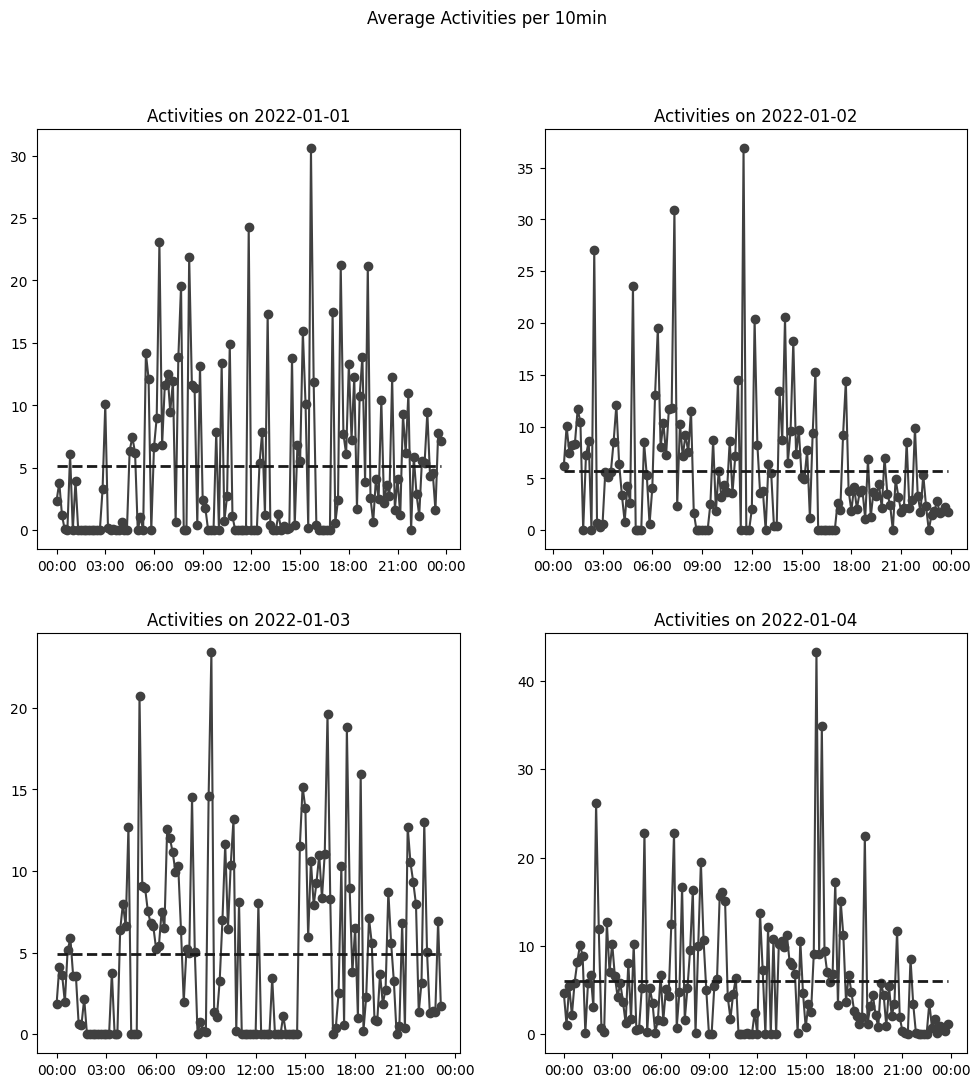

In [10]:
import matplotlib.dates as mdates

# 22.01.01 ~ 22.01.04 データを四つのグラフに同時に描きます。
plt.rcParams['figure.figsize'] = [12, 12]

# 2行2列、合計４つのサブグラフを生成します。
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Average Activities per 10min')

ax1.set_title('Activities on 2022-01-01')
ax1.plot( result1.index, result1['mean'], c='0.25', marker='o')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax1.hlines(result1['mean'].mean(), min(result1.index),
           max(result1.index), color='0.1', linestyle='--', linewidth=2)

ax2.set_title('Activities on 2022-01-02')
ax2.plot( result2.index, result2['mean'], c='0.25', marker='o')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax2.hlines(result2['mean'].mean(), min(result2.index),
           max(result2.index), color='0.1', linestyle='--', linewidth=2)

ax3.set_title('Activities on 2022-01-03')
ax3.plot(result3.index, result3['mean'], c='0.25', marker='o')
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax3.hlines(result3['mean'].mean(), min(result3.index),
           max(result3.index), color='0.1', linestyle='--', linewidth=2)

ax4.set_title('Activities on 2022-01-04')
ax4.plot(result4.index, result4['mean'], c='0.25', marker='o')
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax4.hlines(result4['mean'].mean(), min(result4.index),
           max(result4.index), color='0.1', linestyle='--', linewidth=2)

plt.show()